In [1]:
# 라이브러리 호출
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import platform
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'

# 마이너스 기호 처리
plt.rcParams['axes.unicode_minus'] = False

## 제3장 EDA와 시각화

### EDA란?

- EDA(Exploratory Data Analysis) : 탐색적 데이터 분석
  - 그래프 및 통계적 분석 방법을 활용하여 데이터를 탐구하고 분석하는 과정

### (1) 막대그래프 및 히스토그램

In [2]:
# 와인 데이터 가져오기
from sklearn.datasets import load_wine

wine_load = load_wine()
wine = pd.DataFrame(
    wine_load.data,
    columns = wine_load.feature_names
)

# 타겟 변수 설정
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({
    0 : 'class_0',
    1 : 'class_1',
    2 : 'class_2'
})

### 막대그래프
> **범주형 데이터** 요약 및 시각화에 효과적인 그래프

In [3]:
# 도수분포표 : 범주별 값의 개수

# value 기준 내림차순 정렬
# wine_type = wine["Class"].value_counts()

# index 기준 오름차순 정렬
wine_type = wine["Class"].value_counts().sort_index()
wine_type

Class
class_0    59
class_1    71
class_2    48
Name: count, dtype: int64

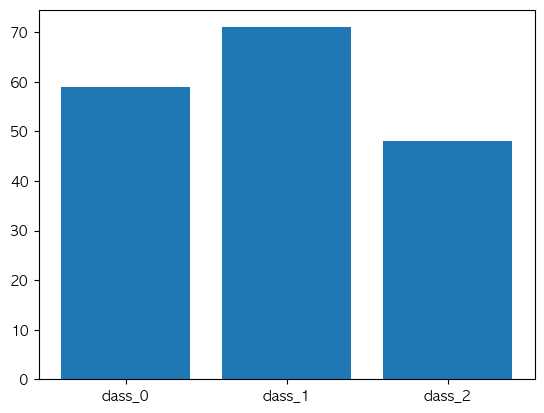

In [4]:
# 막대그래프 그리기

# 범주 데이터 : [class_0, class_1, class_2]
x = wine_type.index 

# 범주별 값의 개수
counts = wine_type.values

plt.bar(
    x, 
    counts,
    width=0.8,
    bottom = None,
    align = 'center'
)
plt.show()

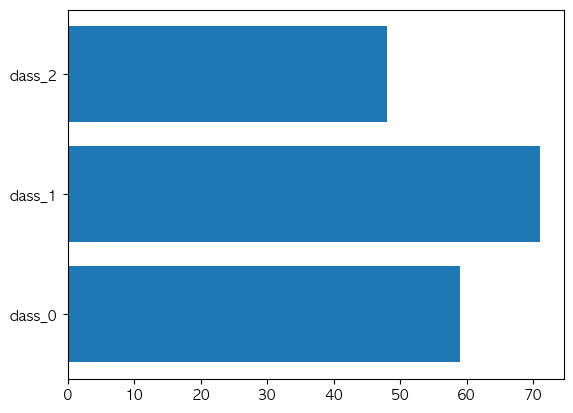

In [5]:
# 수평 막대그래프 그리기 : barh()

plt.barh(
    x, 
    counts,
    height=0.8,
    left = None,
    align = 'center'
)
plt.show()

막대그래프 분석
- 범주별 빈도 차이 확인 : 빈도값이 극단적인 차이를 보이는 경우, 데이터 전처리 과정에서 샘플링 등을 통해 각 범주의 개수가 유사하도록 조정하는 과정을 고려해볼 수 있음

### 히스토그램

> **연속형 데이터** 요약 및 시각화에 효과적인 그래프

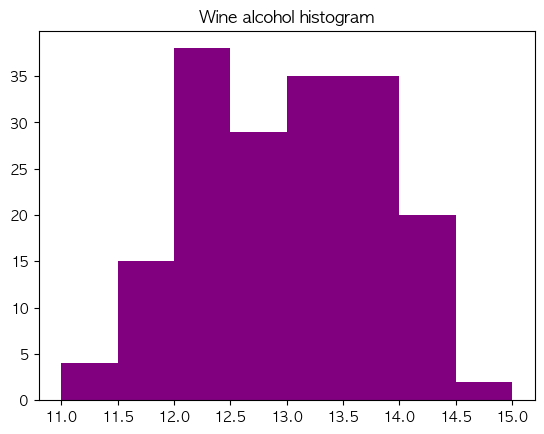

In [6]:
# wine 데이터의 'alcohol' 컬럼 시각화

# 11~15 범위를 8 구간(범위 : 0.5)으로 나누어 시각화
plt.title('Wine alcohol histogram')
plt.hist(
    'alcohol',
    bins = 8,
    range = (11, 15),
    color = 'purple',
    data = wine
)
plt.show()

히스토그램 분석
- 데이터 분포 모양 확인
  - wine 데이터의 alcohol 컬럼은 12~12.5 구간에 가장 많은 데이터가 분포되어 있음
  - 하나의 봉우리를 가진 정규분포의 모양을 보이기 보단 12~14도 구간에 밀집되어 있는 것으로 해석할 수 있음

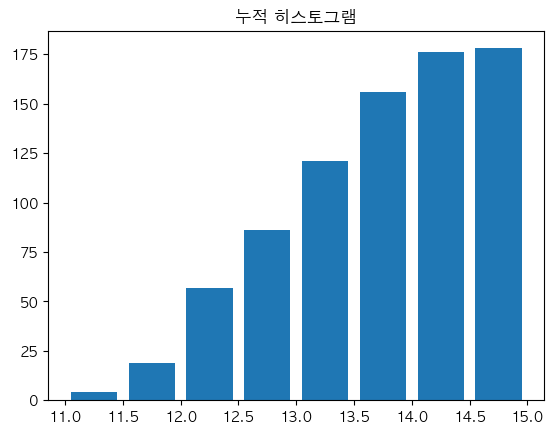

In [7]:
# cumulative = True
plt.title('누적 히스토그램')
plt.hist(
    wine['alcohol'],
    bins = 8,
    range = (11, 15),
    rwidth = 0.8,
    align='mid',
    cumulative = True
)
plt.show()

### (2) 상자 그림(Box Plot)

> 사분위수(Quantile)를 이용하여 수치형 변수의 값의 분포를 확인하는 그래프
> 
> 상자의 크기, 중앙값 선의 위치, 수염의 길이를 통해 값의 분포와 대칭 정도, 이상치 등을 확인할 수 있음

In [8]:
# iris 데이터 가져오기

from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(
    iris.data,
    columns = iris.feature_names
)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({
    0 : 'Setosa',
    1 : 'Versicolour',
    2 : 'Virginica'
})

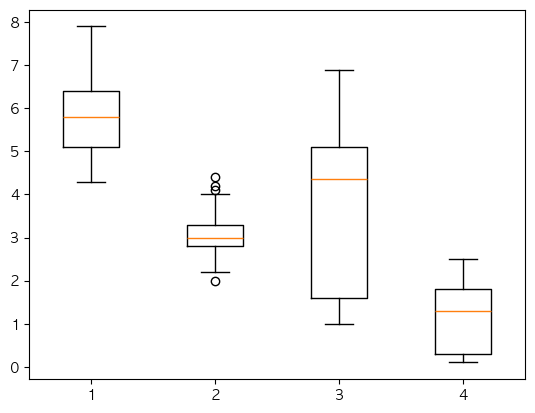

In [9]:
# boxplot 그리기
# 'Class' 컬럼과 같은 문자열 변수는 그릴 수 없음

# 'Class' 컬럼을 제외한 나머지 컬럼의 boxplot 그리기
plt.boxplot(iris.drop(columns = 'Class'))
plt.show()

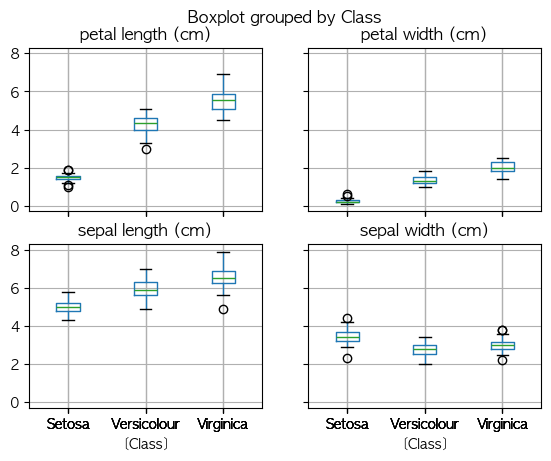

In [10]:
# 범주형 변수에 따라 분리하여 boxplot 표현

iris.boxplot(by='Class')
plt.show()

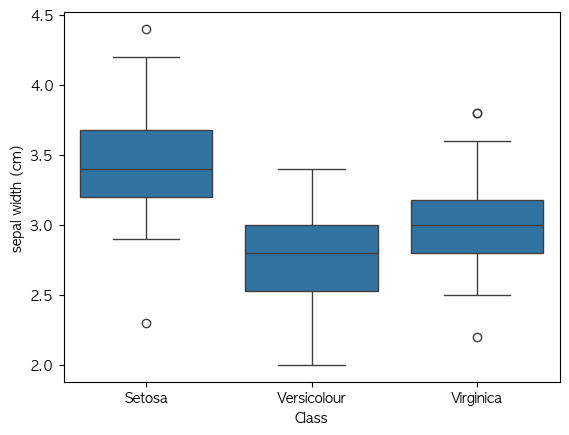

In [11]:
# seaborn 라이브러리를 활용하여 시각화

import seaborn as sns
sns.boxplot(
    x = 'Class',
    y = 'sepal width (cm)',
    data = iris
)
plt.show()

### (3) 산점도(Scatter Plot)

> 수치형 변수 각각의 분포 및 두 변수간 관계를 확인하는 기본적인 그래프

Scatter Plot 해석
- 관계의 유형
  - 우상향 형태 : 양의 선형관계
  - 우하향 형태 : 음의 선형관계
  - 어떠한 패턴도 가지지 않는 경우 : 상관관계 없음
  - 비선형관계 등
- 관계의 강도
  - 적합선에 가깝게 모여 있는 정도를 통해 두 변수 간의 관계의 강도 추정 가능

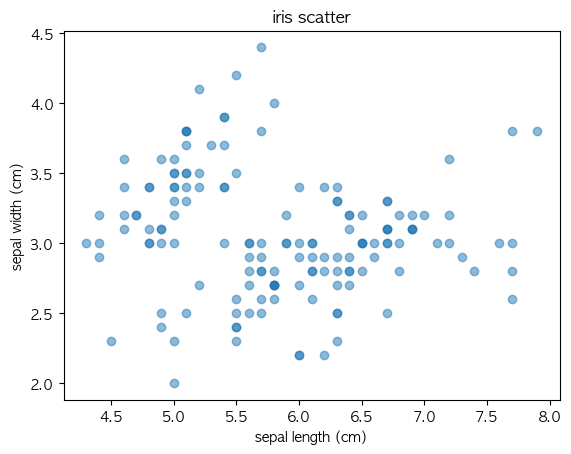

In [12]:
# 산점도 그리기
plt.title('iris scatter')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.scatter(
    x = iris['sepal length (cm)'],
    y = iris['sepal width (cm)'],
    alpha = 0.5
)
plt.show()

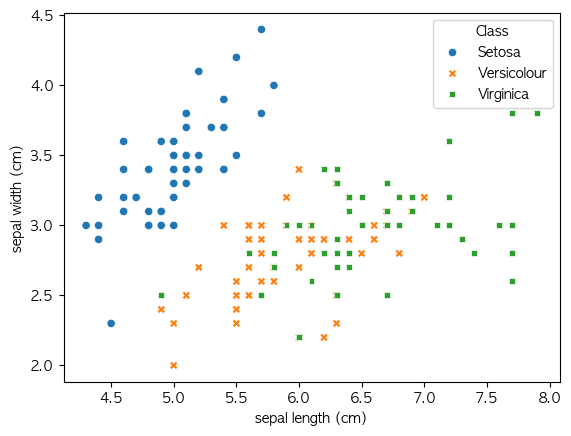

In [13]:
# 범주형 변수에 따라 색을 분리하여 표현

import seaborn as sns
sns.scatterplot(
    x = 'sepal length (cm)',
    y = 'sepal width (cm)',
    data = iris,
    hue = 'Class',
    style='Class'
)
plt.show()

### (4) 선 그래프



#### 수평선, 수직선 그래프

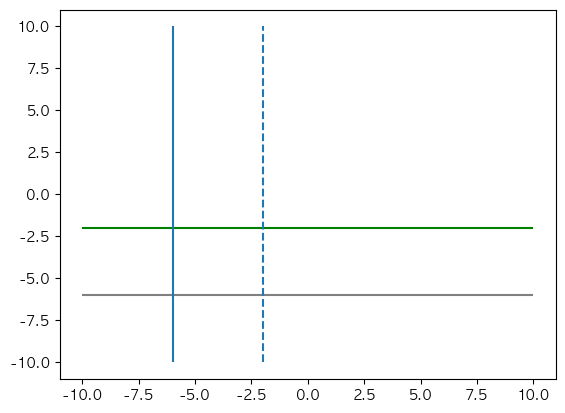

In [14]:
# 수평선 : plt.hlines(y, xmin, xmax)
plt.hlines(-6, -10, 10, color='grey')
plt.hlines(-2, -10, 10, color='green')

# 수직선 : plt.vlines(x, ymin, ymax)
plt.vlines(-6, -10, 10, linestyles='solid')
plt.vlines(-2, -10, 10, linestyles = 'dashed')

plt.show()

#### 함수식 그래프

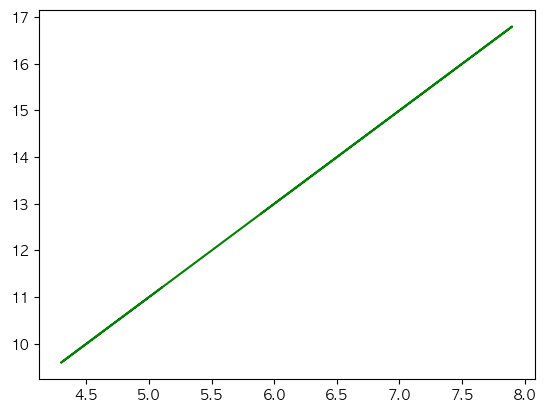

In [15]:
# 그래프
def linear_func(x):
    return 2*x + 1

X = iris['sepal length (cm)']
plt.plot(X, linear_func(X), c='green')
plt.show()

#### 회귀선 그래프

> 함수식 그래프를 활용하여 y축에 회귀식 입력

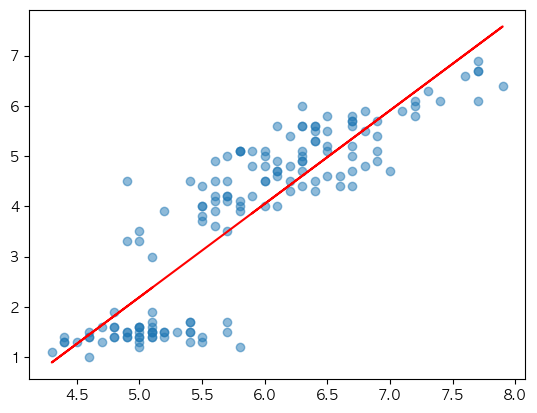

In [16]:
# 1차식

X = iris['sepal length (cm)']
Y = iris['petal length (cm)']

# np.polyfit() : X값, Y값, 차수를 입력받아 최소제곱 다항식에 적합
# 가장 높은 차원의 계수부터 순서대로 리턴됨
b1, b0 = np.polyfit(X, Y, 1)

# 산점도 그리기
plt.scatter(
    x = X,
    y = Y,
    alpha = 0.5
)
# 회귀선 그리기
plt.plot(X, b1 * X + b0, color='red')
plt.show()

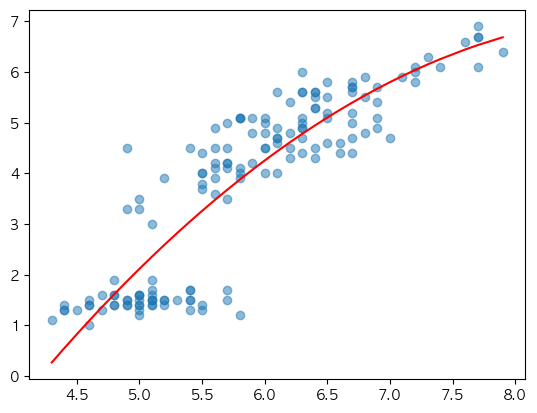

In [17]:
# 2차식
# 2차 이상의 그래프를 그리는 경우,
# 데이터를 X값에 대하여 정렬할 필요가 있음

iris2 = iris.sort_values(by='sepal length (cm)')
X = iris2['sepal length (cm)']
Y = iris2['petal length (cm)']

b2, b1, b0 = np.polyfit(X, Y, 2)

# 산점도 그리기
plt.scatter(
    x = X,
    y = Y,
    alpha = 0.5
)
# 회귀선 그리기
plt.plot(X, b2 * (X**2) + b1 * X + b0, color='red')
plt.show()

#### 꺾은선 그래프
> 시간의 변화에 따라 값이 지속적으로 변화할 때 유용함
>
> (X축:시점 / Y축:값)

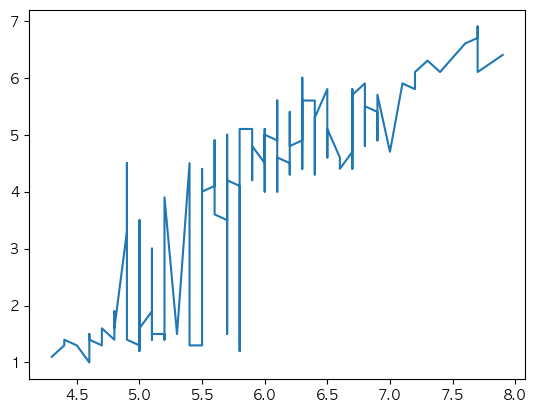

In [18]:
# X축 값에 대한 정렬 필요

iris2 = iris.sort_values(by='sepal length (cm)')
plt.plot(
    'sepal length (cm)', 
    'petal length (cm)', 
    data=iris2
)
plt.show()

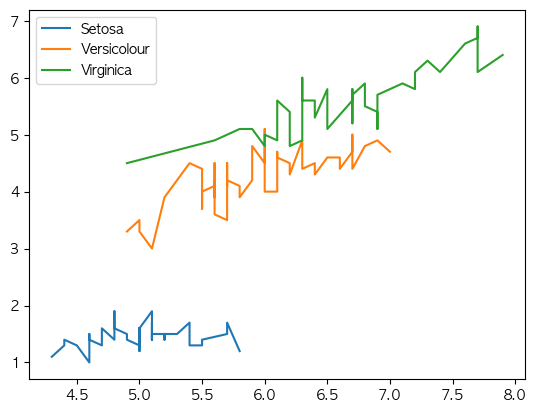

In [19]:
# 범주형 변수에 따라 분리된 그래프

plt.plot(
    'sepal length (cm)',
    'petal length (cm)',
    data = iris2.loc[iris2['Class']=='Setosa'],
    label='Setosa'
)

plt.plot(
    'sepal length (cm)',
    'petal length (cm)',
    data = iris2.loc[iris2['Class']=='Versicolour'],
    label='Versicolour'
)

plt.plot(
    'sepal length (cm)',
    'petal length (cm)',
    data = iris2.loc[iris2['Class']=='Virginica'],
    label='Virginica'
)

# 설정한 label을 범례 표시
plt.legend()

# plt.legend(
#     iris2.Class.unique()
# )

plt.show()

### (5) 상관관계 시각화

> 상관관계 : 두 변수 간의 선형관계를 표현하는 통계적 측도
> - 산점도를 통해 분석한 관계의 유형 및 강도를 수량화하여 데이터 간 단순관계 표현

#### 산점도 행렬

> 두 개 이상의 변수가 있는 데이터에서 변수들 간의 산점도를 그린 그래프

산점도 행렬 해석 방법
1. 대각선의 히스토그램 : 이상치 확인
2. 종속변수(y)와 설명변수들(X) 간의 관계 시각화
3. 종속변수(y)의 데이터 유형에 따른 분석
   - 수치형 : 각 설명변수와의 직선 상관관계 비교
   - 범주형 : 종속변수를 잘 구분하는 설명변수 파악
4. 설명변수(X) 간의 직선 함수관계 파악 : 다중공선성 문제 진단

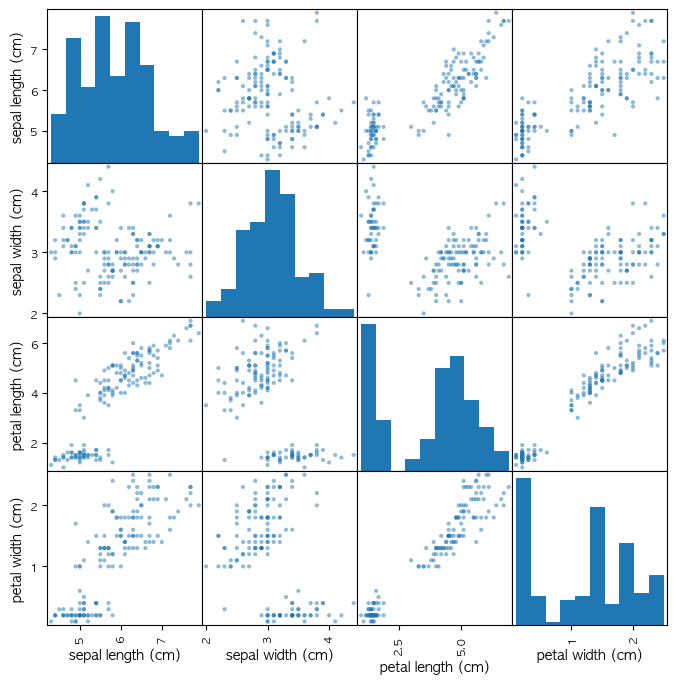

In [20]:
# 산점도 행렬 그리기
from pandas.plotting import scatter_matrix
scatter_matrix(
    iris, 
    alpha = 0.5,
    figsize = (8,8),
    diagonal = 'hist'
    # diagonal = 'kde'
)
plt.show()

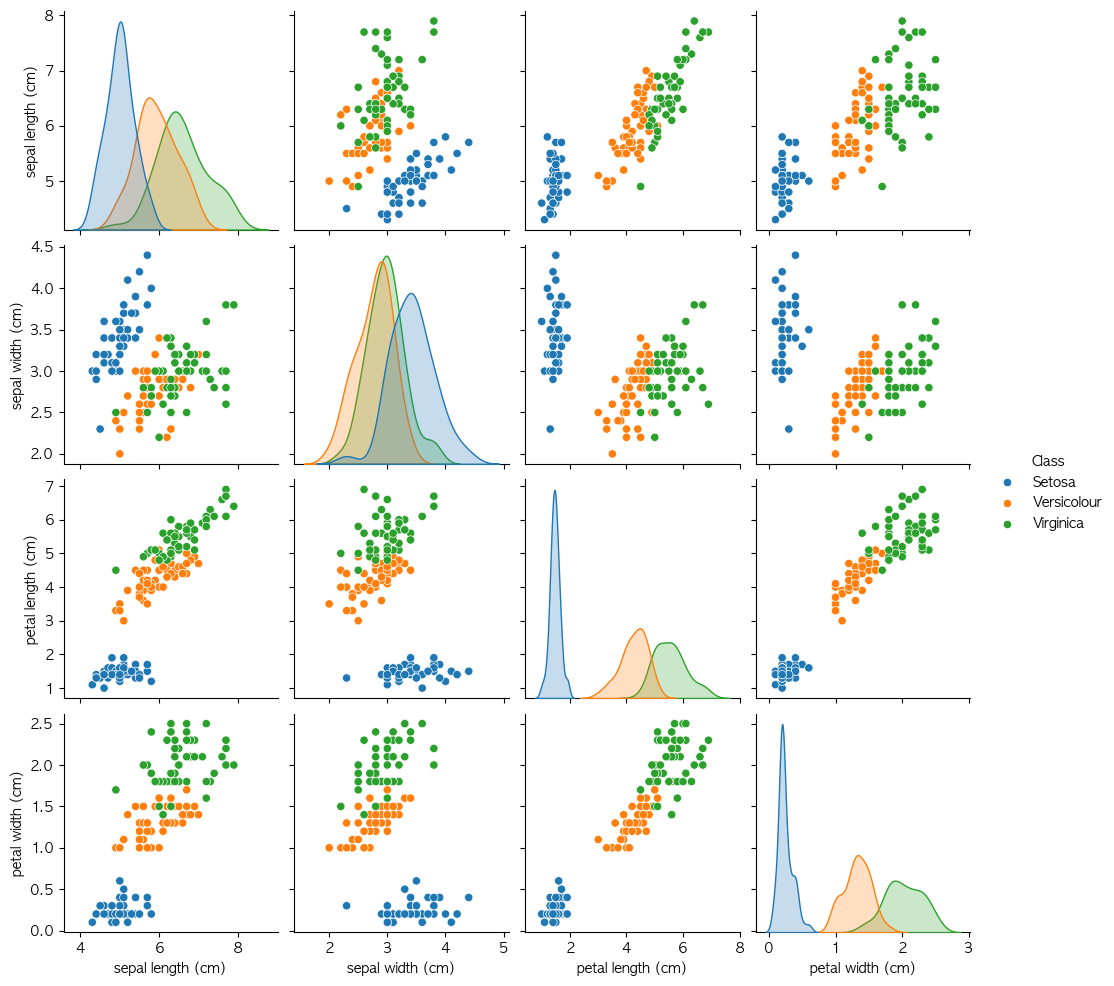

In [21]:
# target 범주별 색깔을 다르게 지정한 산점도 행렬 그리기

import seaborn as sns

sns.pairplot(
    iris,
    diag_kind='auto',
    hue = 'Class'
)
plt.show()

#### 상관계수 행렬 그래프

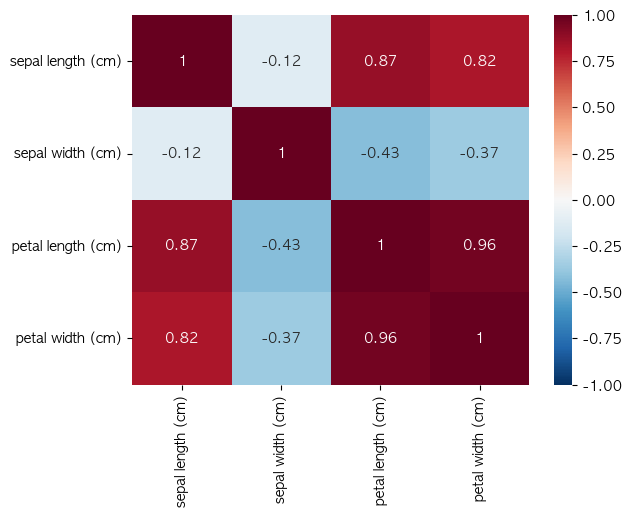

In [22]:
# 상관행렬 생성
iris_corr = iris.drop(
    columns = 'Class'
).corr(method='pearson')

# 상관행렬 시각화
sns.heatmap(
    iris_corr,
    xticklabels = iris_corr.columns,
    yticklabels = iris_corr.columns,
    cmap = 'RdBu_r',
    annot = True,
    vmin = -1, vmax = +1
)
plt.show()